Bo Yang (Aaron) USCID:7526922531

### INF 552 HOMEWORK_2  Date: 09-23-2019

## (b) Exploring the data:

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

#### Answer:
- there are 9568 rows and 5 columns in this data set
- 9568 row of records are operating logs which recorded from a full load Combined Cycle Power Plant in 6 years
- 5 numeric columns represent different features value. 'T','V','AP','RH' and'EP' means 'Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity' and 'Energy Output', respecitly.

### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

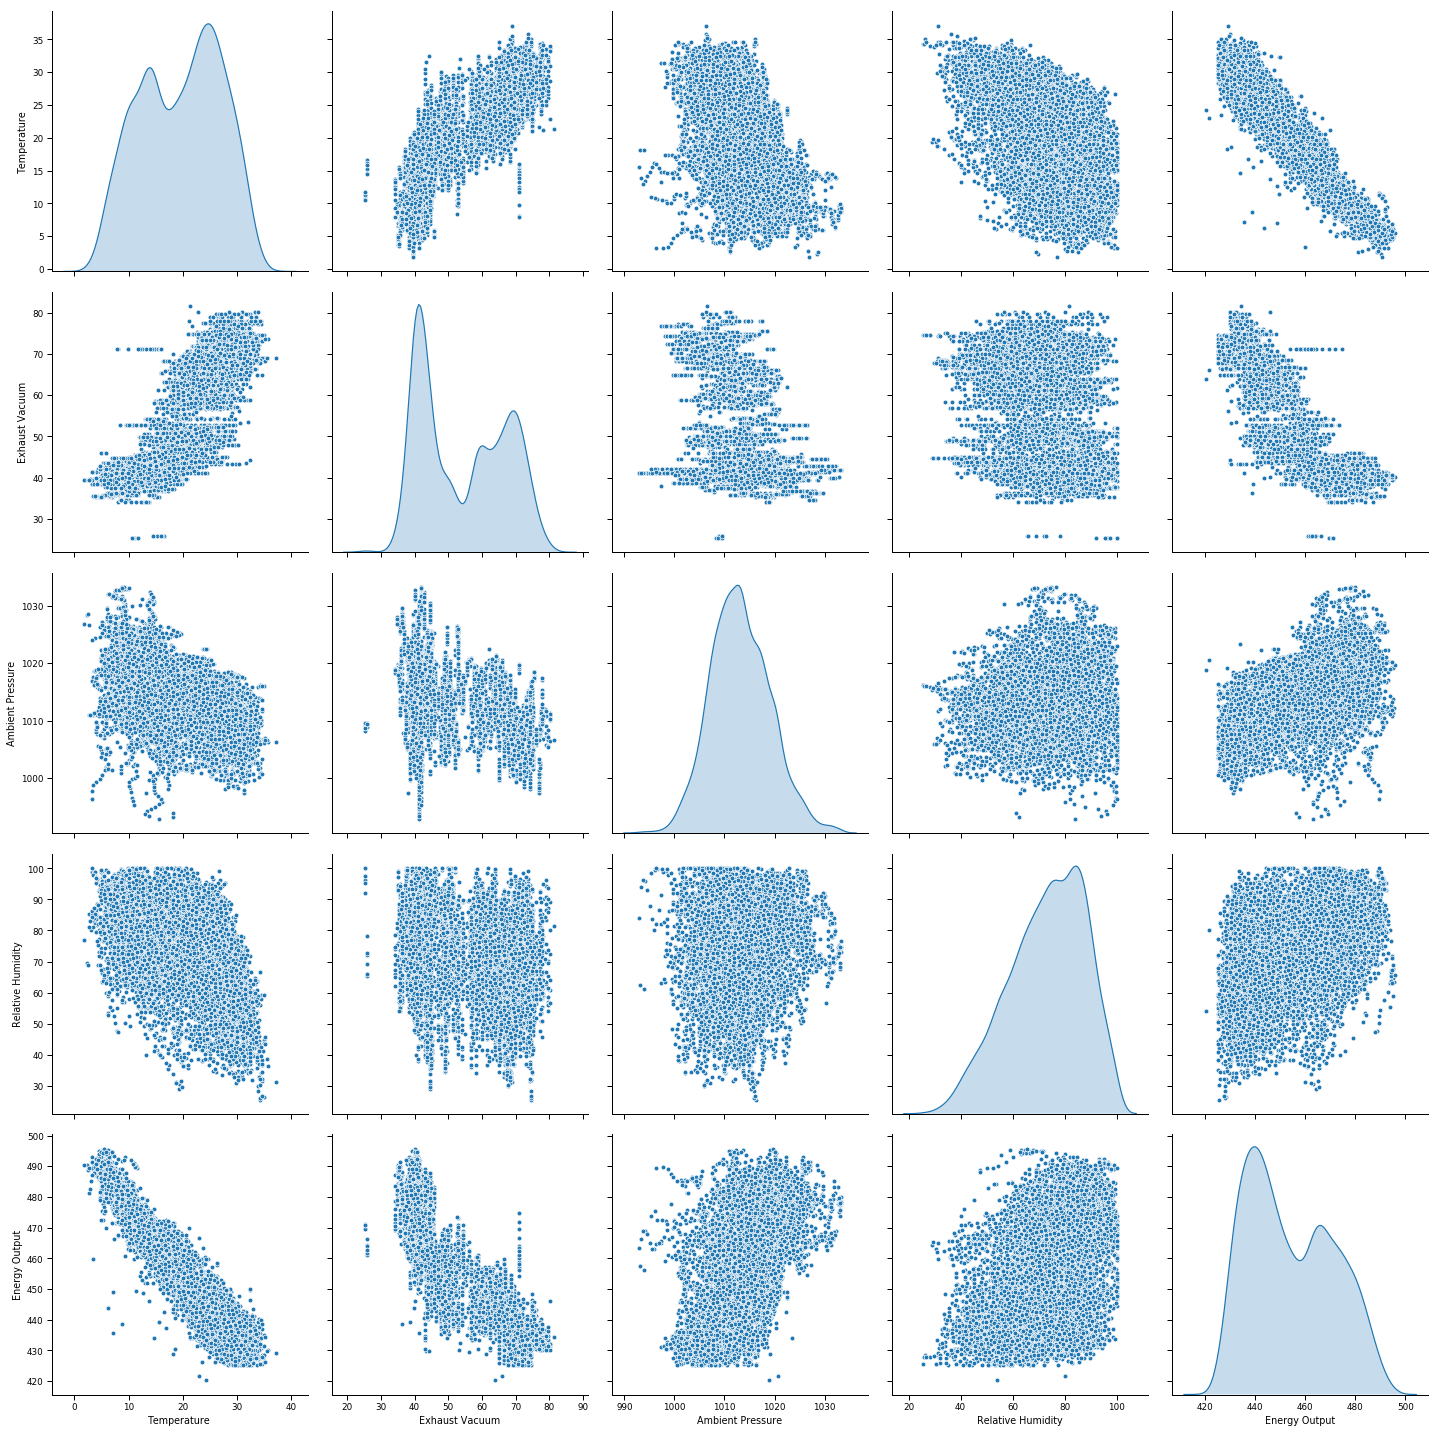

In [2]:
df = pd.read_csv('./assets/data.csv')
sns.set_context("paper")
grid = sns.pairplot(df, palette="Set2", diag_kind="kde", height=4, kind='scatter')
plt.show()

#### Findings: From pairwise scatterplots, we can see there do really exist some linear relationship between some variables, such as when temperature raises the energy output will drop sharply. But some others doesn't or at least doesn't show significant linear effects.

### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [3]:
df = pd.read_csv('./assets/data.csv')
print("---------------------------------------------------------"
      "--------------------------------------------------------")
result = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Range(Min-Max)": list(zip(df.min().get_values(), df.max().get_values())),
    "First Quartiles": df.quantile(.25),
    "Third Quartiles": df.quantile(.75),
    "Interquartile Range": df.quantile(.75) - df.quantile(.25)
})
print(result.to_string())
print("---------------------------------------------------------"
      "--------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------
                          Mean    Median    Range(Min-Max)  First Quartiles  Third Quartiles  Interquartile Range
Temperature          19.651231    20.345     (1.81, 37.11)          13.5100            25.72              12.2100
Exhaust Vacuum       54.305804    52.080    (25.36, 81.56)          41.7400            66.54              24.8000
Ambient Pressure   1013.259078  1012.940  (992.89, 1033.3)        1009.1000          1017.26               8.1600
Relative Humidity    73.308978    74.975   (25.56, 100.16)          63.3275            84.83              21.5025
Energy Output       454.365009   451.550  (420.26, 495.76)         439.7500           468.43              28.6800
-----------------------------------------------------------------------------------------------------------------


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [4]:
import numpy as np

def load_data(file_path):
    """read records from csv file"""
    row_data = np.genfromtxt(file_path, dtype=None, delimiter=',', encoding='utf-8')[1:]
    X = np.array(row_data[:, :-1], dtype=float)
    y = np.array(row_data[:, row_data.shape[1] - 1], dtype=float)
    return X, y

In [5]:
# Aaron's Linear Regression
__author__ = 'Aaron Yang'
__email__ = 'byang971@usc.edu'
__date__ = '9/11/2019 9:19 AM'

from scipy import stats


class LinearRegression:
	'''y = β0 + β1X1 + β2X2 + ... + βnXn'''
	'''intercept = β0'''

	def __init__(self):
		"""Initialize Linear Regression Model"""
		self.coefficient_ = None
		self.intercept_ = None
		self._beta = None

		# Argumented Matrix
		self._X_b_train = None
		self._X_b_test = None

		# Only used for summary()
		self._X_train = None
		self._y_train = None

	def fit(self, X_train, y_train):
		"""Training model through X_train, y_train"""
		assert X_train.shape[0] == y_train.shape[0], \
			"the size of X_train must be equal to the size of y_train"
		self._X_train = X_train
		self._y_train = y_train

		# X_b = [1| X] matrix   (Argumented Matrix)
		# [beta] = a vector containing (β0, β1, β2, β3, ...βn) shape(-1, 1)
		self._X_b_train = np.hstack([np.ones((len(X_train), 1)), X_train])
		# y_hat (y_predict) = X_b .dot [beta]
		self._beta = np.linalg.inv(self._X_b_train.T.dot(self._X_b_train)).dot(self._X_b_train.T).dot(y_train)
		self.intercept_ = self._beta[0]
		self.coefficient_ = self._beta[1:]

		return self

	def fit_poly(self, X_train, y_train):
		"""Training model through X_train, y_train"""
		assert X_train.shape[0] == y_train.shape[0], \
			"the size of X_train must be equal to the size of y_train"
		self._X_train = X_train
		self._y_train = y_train

		# [1, a, b, a^2, ab, b^2].
		# [beta] = a vector containing (β0, β1, β2, β3, ...βn) shape(-1, 1)
		# y_hat (y_predict) = X_train .dot [beta]
		self._beta = np.linalg.inv(self._X_train.T.dot(self._X_train)).dot(self._X_train.T).dot(y_train)
		self.intercept_ = self._beta[0]
		self.coefficient_ = self._beta[1:]
		self.coefficient_ = np.insert(self.coefficient_, 0, 0)

		return self

	def predict(self, X_predict):
		"""Make prediction based on X_predict Matrix, return a vector with one dimension"""
		assert self.intercept_ is not None and self.coefficient_ is not None, \
			"must fit before predict!"
		assert X_predict.shape[1] == len(self.coefficient_), \
			"the feature number of X_predict must be equal to X_train"

		self._X_b_test = np.hstack([np.ones((len(X_predict), 1)), X_predict])
		return self._X_b_test.dot(self._beta)

	def predict_poly(self, X_predict):
		"""Make prediction based on X_predict Matrix, return a vector with one dimension"""
		assert self.intercept_ is not None and self.coefficient_ is not None, \
			"must fit before predict!"
		assert X_predict.shape[1] == len(self.coefficient_), \
			"the feature number of X_predict must be equal to X_train"

		self._X_b_test = X_predict
		return self._X_b_test.dot(self._beta)

	def get_MSE(self, X_test, y_test):
		y_predict = self.predict(X_test)
		return np.sum((y_test - y_predict) ** 2) / len(y_test)

	def MSE(self):
		'''Equal to the RSS (resdiual sum of square)'''
		if self._X_b_test is None:
			self._X_b_test = np.hstack([np.ones((len(self._X_train), 1)), self._X_train])
		y_predict = self._X_b_test.dot(self._beta)
		return np.sum((self._y_train - y_predict) ** 2) / len(self._y_train)

	def RSS(self):
		'''Equal to the MSE (mean square of error)'''
		if self._X_b_test is None:
			self._X_b_test = np.hstack([np.ones((len(self._X_train), 1)), self._X_train])
		y_predict = self._X_b_test.dot(self._beta)
		return np.sum((self._y_train - y_predict) ** 2) / len(self._y_train)

	def score(self, X_test, y_test):
		'''based on R square and its forumla is 1 - RSS / TSS'''
		y_predict = self.predict(X_test)
		return 1 - np.sum((y_test - y_predict) ** 2) / len(y_test) / np.var(y_test)

	def _standard_error(self):
		if self._X_b_test is None:
			self._X_b_test = np.hstack([np.ones((len(self._X_train), 1)), self._X_train])
		return np.sqrt(self.RSS() * (np.linalg.inv(np.dot(self._X_b_test.T, self._X_b_test)).diagonal()))

	def _t_statistic(self):
		'''t_statistic = beta_hat - beta / std_error'''
		return self._beta / self._standard_error()

	def _p_value(self):
		_t_statistic_list = self._t_statistic()
		return [2 * (1 - stats.t.cdf(np.abs(i), (len(self._X_b_test) - 1))) for i in _t_statistic_list]

	def summary(self, labels=None):
		if labels is not None: labels.insert(0, 'Intercept')
		return pd.DataFrame({
			"Coefficients:": self._beta,
			"Std. Error": self._standard_error(),
			"t-statistic": self._t_statistic(),
			"p-value": self._p_value()
		}, index=labels)

	def __repr__(self):
		return "AYLinearRegression()"

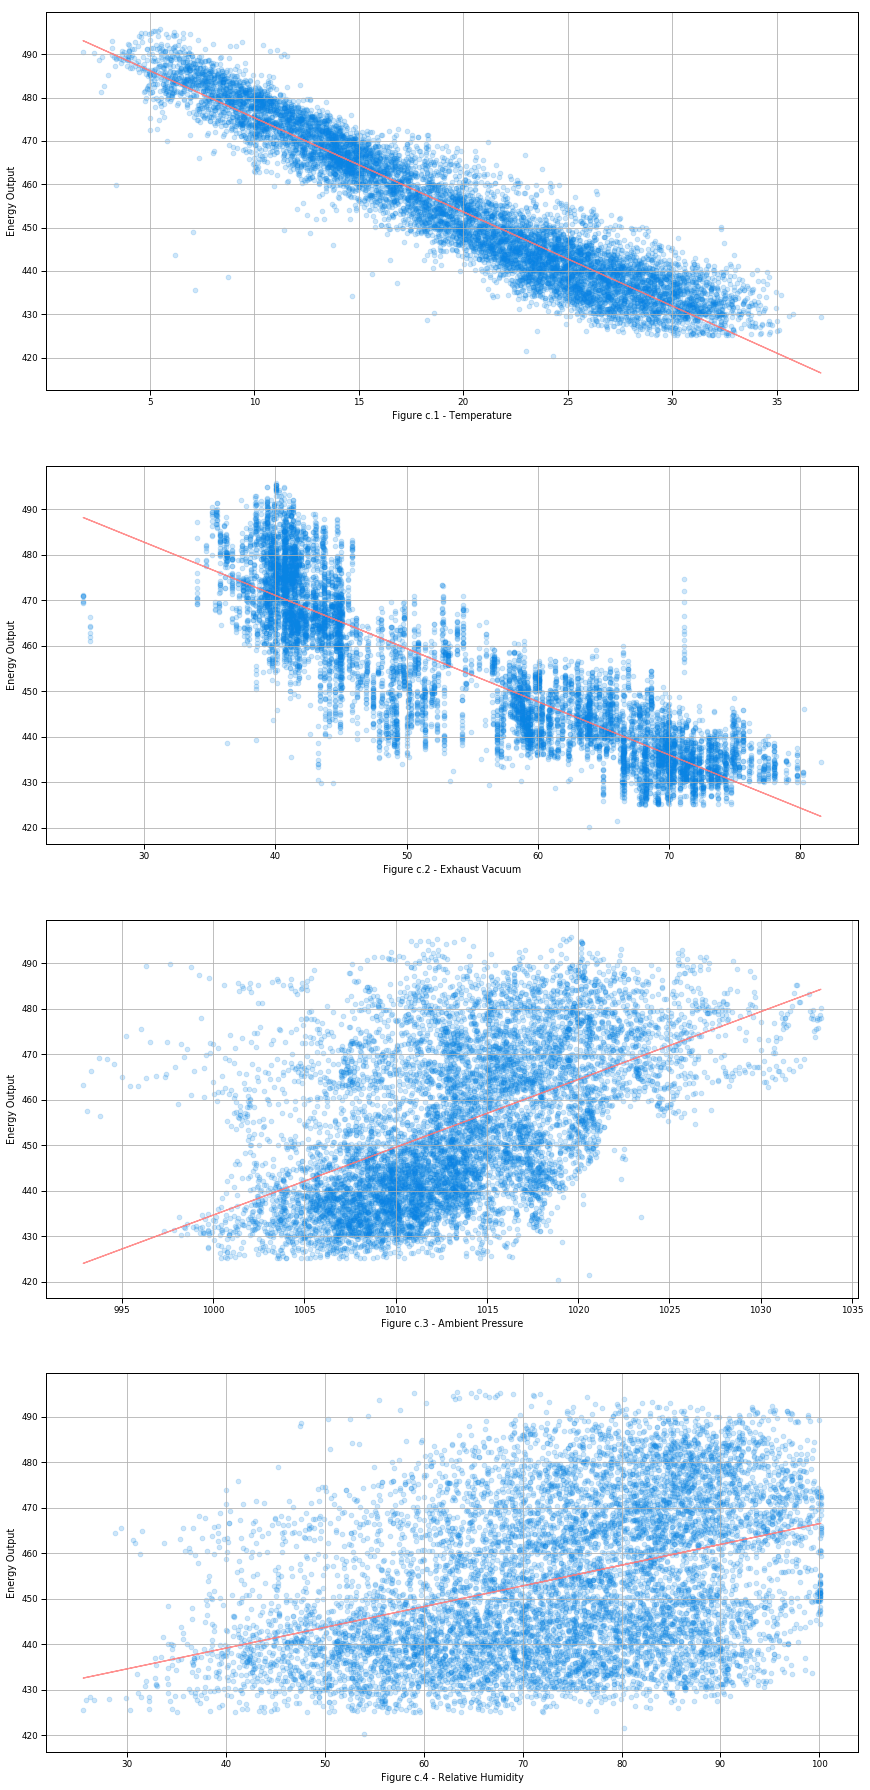

In [6]:
X, y = load_data("./assets/data.csv")

labels = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(32, 32))

for index in range(4):
    X_data = X[:, index].reshape(-1, 1)

    # Aaron's own Linear Regression
    linear_regression = LinearRegression().fit(X_data, y)
    y_predict = linear_regression.predict(X_data)

    ax[index, 0].scatter(X_data, y, color='#0984e3', alpha=0.2)
    ax[index, 0].plot(X_data, y_predict, color='#ff7675', alpha=0.8)
    ax[index, 0].grid(True)
    ax[index, 0].set_ylabel("Energy Output")
    ax[index, 0].set_xlabel("Figure c.{} - {}".format(index + 1, labels[index]))
    ax[index, 1].remove()

plt.show()

#### Answers:
- Finding: As the figures are shown above, it is cleary that temperature and exhaust vacuum, these two variables has a strong connection with the result, the energy output.
- Outliers: From above figure c.4, I noticed that there is some data point lining up vertically, especially when the X value reaches the maximum. These data point might impose a negative impact on my regression tasks.

## (d) Fit a multiple regression model to predict the response using all of the predictors.  Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [7]:
import statsmodels.api as sm

X_data, y_data = load_data("./assets/data.csv")
labels = ['Intercept', 'Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']

#OLS
# X_data_constant = sm.add_constant(X_data)
# model = sm.OLS(y_data, X_data_constant)
# results = model.fit()
# print(results.summary())

# Aaron's own Linear Regression
linear_regression = LinearRegression().fit(X_data, y_data)
summary = linear_regression.summary()

R_square_list = [linear_regression.score(X_data, y_data)]
for index in range(4):
    X_single_train = X_data[:, index].reshape(-1, 1)
    linear_regression = LinearRegression().fit(X_single_train, y_data)
    R_square_list.append(linear_regression.score(X_single_train, y_data))

summary = summary.join(pd.DataFrame({'R-square': np.array(R_square_list)}))
summary.index = labels
print(summary.to_string())

                   Coefficients:  Std. Error  t-statistic       p-value  R-square
Intercept             454.609274    9.745965    46.645899  0.000000e+00  0.928696
Temperature            -1.977513    0.015285  -129.375833  0.000000e+00  0.898948
Exhaust Vacuum         -0.233916    0.007280   -32.130505  0.000000e+00  0.756518
Ambient Pressure        0.062083    0.009456     6.565802  5.444223e-11  0.268769
Relative Humidity      -0.158054    0.004167   -37.928385  0.000000e+00  0.151939


#### Findings: According to the P-values I got, all the p-value are less than 0.05, implying that all the predictors impose a significant effect on response somehow.

## (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

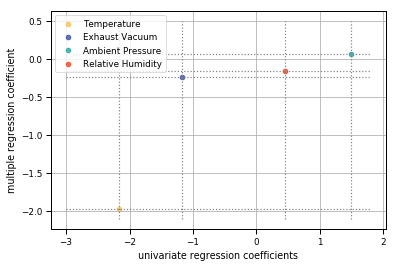

In [8]:
X_data, y_data = load_data("./assets/data.csv")
colors = ['#f6b93b', '#1e3799', '#079992', '#eb2f06']
labels = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']

# Aaron's own Linear Regression
linear_regression = LinearRegression().fit(X_data, y_data)
mult_reg_coef = linear_regression.coefficient_

single_reg_coef = list()
for index in range(4):
    X_single_train = X_data[:, index].reshape(-1, 1)
    linear_regression = LinearRegression().fit(X_single_train, y_data)
    single_reg_coef.append(linear_regression.coefficient_[0])

for index in range(0, 4):
    plt.scatter(single_reg_coef[index], mult_reg_coef[index],
                label=labels[index], color=colors[index], alpha=0.7)
plt.vlines(single_reg_coef, -2.1, 0.5, colors='gray', linestyles='dotted')
plt.hlines(mult_reg_coef, -3, 1.8, colors='gray', linestyles='dotted')
plt.xlabel("univariate regression coefficients")
plt.ylabel("multiple regression coefficient")
plt.grid(True)
plt.legend()
plt.show()

#### Answer: After seeing the 1 C scatterplots, I thought the variable Relative Humidity (RH) will have a higher p-value, It won't make much difference in the output. But when I finished 1 D. I found that RH's p-value is still less than 0.05. I also used OLS to check my result. So we may come to the conclusion that we cannot say whether two variables have a linear relationship just based on the scatterplot.

## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form1 Y = β0 + β1X + β2X2 + β3X3 + ε

-----------------------Temperature------------------
           Coefficients:  Std. Error  t-statistic       p-value
Intercept     492.728143    0.672758   732.400723  0.000000e+00
β1             -0.610346    0.123497    -4.942179  7.856461e-07
β2             -0.125138    0.006875   -18.202700  0.000000e+00
β3              0.002675    0.000118    22.598913  0.000000e+00
-----------------------Exhaust Vacuum------------------
           Coefficients:  Std. Error  t-statistic   p-value
Intercept     554.146849    9.148863    60.570024  0.000000
β1             -2.144377    0.508706    -4.215357  0.000025
β2             -0.002712    0.009213    -0.294411  0.768450
β3              0.000134    0.000055     2.465094  0.013715
-----------------------Ambient Pressure------------------
           Coefficients:     Std. Error  t-statistic  p-value
Intercept   4.867490e+06  287637.175471    16.922326      0.0
β1         -1.437035e+04     850.691611   -16.892545      0.0
β2          1.414121e+01   

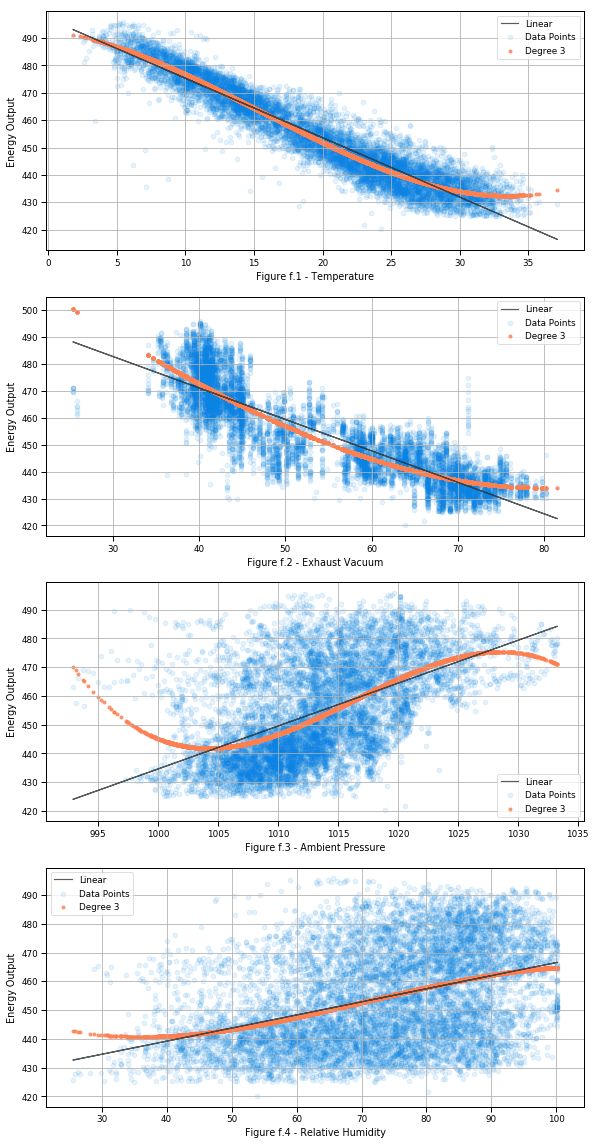

In [9]:
from sklearn.preprocessing import PolynomialFeatures
X_data, y_data = load_data("./assets/data.csv")
labels = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']

poly = PolynomialFeatures(degree=3)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

single_reg_coef = list()
for index in range(4):
    X_train = X_data[:, index].reshape(-1, 1)
    X_train_poly = poly.fit_transform(X_train)

    linear_regression = LinearRegression().fit(X_train, y_data)
    y_predict = linear_regression.predict(X_train)

    linear_regression_poly = LinearRegression().fit_poly(X_train_poly, y_data)
    y_predict_poly = linear_regression_poly.predict_poly(X_train_poly)
    print("-----------------------{}------------------".format(labels[index]))
    print(linear_regression_poly.summary(['β1', 'β2', 'β3']))

    ax[index, 0].scatter(X_train, y_data, color='#0984e3', label='Data Points', alpha=0.1)
    ax[index, 0].plot(X_train, y_predict, color='#2d3436', label='Linear', alpha=0.8)
    ax[index, 0].scatter(X_train, y_predict_poly, color='#ff7f50', s=10, label='Degree 3', alpha=0.8)
    ax[index, 0].set_ylabel("Energy Output")
    ax[index, 0].set_xlabel("Figure f.{} - {}".format(index + 1, labels[index]))
    ax[index, 0].grid(True)
    ax[index, 0].legend()
    ax[index, 1].remove()

fig.tight_layout()
plt.show()

#### Findings: Based on the p-value I got, only the Exhaust Vaccum (EV) has a uncommon value. And I also noticed that the Ambient Pressure (AP) has an extremely high coefficient and its plot is the most flexible.

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [10]:
X_data, y_data = load_data("./assets/data.csv")
labels = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity', 'Temperature x Exhaust Vacuum',
          'Temperature x Ambient Pressure', 'Temperature x Relative Humidity', 'Exhaust Vacuum x Ambient Pressure',
          'Exhaust Vacuum x Relative Humidity', 'Ambient Pressure x Relative Humidity']

for start in range(4):
    for end in range(start + 1, 4):
        temp = X_data[:, start].reshape(-1, 1) * X_data[:, end].reshape(-1, 1)
        X_data = np.append(X_data, temp, 1)

linear_regression = LinearRegression().fit(X_data, y_data)
print(linear_regression.summary(labels).to_string())

                                      Coefficients:  Std. Error  t-statistic       p-value
Intercept                                685.782459   78.594842     8.725540  0.000000e+00
Temperature                               -4.347014    2.371774    -1.832811  6.686175e-02
Exhaust Vacuum                            -7.674858    1.349984    -5.685148  1.345324e-08
Ambient Pressure                          -0.152355    0.076773    -1.984487  4.723005e-02
Relative Humidity                          1.570907    0.772906     2.032469  4.213374e-02
Temperature x Exhaust Vacuum               0.020971    0.000898    23.351190  0.000000e+00
Temperature x Ambient Pressure             0.001759    0.002338     0.752464  4.517907e-01
Temperature x Relative Humidity           -0.005230    0.000811    -6.448064  1.187619e-10
Exhaust Vacuum x Ambient Pressure          0.006812    0.001326     5.137955  2.832238e-07
Exhaust Vacuum x Relative Humidity         0.000839    0.000488     1.716992  8.601308e-02

#### Findings: From above table data, we can find that Temperature x Exhaust Vacuum, Temperature x Relative Humidity, Exhaust Vacuum x Ambient Pressure and Ambient Pressure x Relative Humidity have a small p-value, implying that they are statistically significant.

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [11]:
# Split Data by a ratio.
def train_test_split_by_ratio(X: object, y: object, test_size: object = 0.2, random_state=None):
    """According to the test_size, split the row data into X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_size <= 1.0, \
        "test_size must be valid"

    if random_state:
        np.random.seed(random_state)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_size)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [12]:
import statsmodels.api as sm

def get_all_possible_interaction_data(X_data):
    # orginal_data have 4 columns => A B C D
    # append AB  AC  AD  BC  BD  CD to the orginal_data obj
    for start in range(4):
        for end in range(start + 1, 4):
            temp = X_data[:, start].reshape(-1, 1) * X_data[:, end].reshape(-1, 1)
            X_data = np.append(X_data, temp, 1)
    # append A^2 B^2 C^2 D^2 to the orginal_data obj
    for index in range(4):
        temp = X_data[:, index].reshape(-1, 1) * X_data[:, index].reshape(-1, 1)
        X_data = np.append(X_data, temp, axis=1)

    return X_data

X_data, y_data = load_data("./assets/data.csv")
X_train, X_test, y_train, y_test = train_test_split_by_ratio(X_data, y_data, test_size=0.3, random_state=2333)
linear_regression = LinearRegression().fit(X_train, y_train)
print("Before Linear Regression Training MSE:", linear_regression.get_MSE(X_train, y_train))
print("Before Linear Regression Testing MSE:", linear_regression.get_MSE(X_test, y_test))

print("----------------------------------------------------------------")
labels = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
combination_labels = ['Temperature x Exhaust Vacuum', 'Temperature x Ambient Pressure',
                      'Temperature x Relative Humidity', 'Exhaust Vacuum x Ambient Pressure',
                      'Exhaust Vacuum x Relative Humidity', 'Ambient Pressure x Relative Humidity',
                      'Temperature^2', 'Exhaust Vacuum^2', 'Ambient Pressure^2', 'Relative Humidity^2']

X_data = get_all_possible_interaction_data(X_data)
X_train, X_test, y_train, y_test = train_test_split_by_ratio(X_data, y_data, test_size=0.3, random_state=2333)
X_train = pd.DataFrame(X_train, columns=labels + combination_labels)
OLS_linear = sm.OLS(y_train, X_train)
OLS_linear_results = OLS_linear.fit()
print(OLS_linear_results.summary())
remaining_var = list(set([key for key, p_value in OLS_linear_results.pvalues.items() if p_value <= 0.05]) - set(labels))
print("----------------------------------------------------------------")
print("The remaining significant variables: ", remaining_var)

# ['Exhaust Vacuum x Ambient Pressure', 'Ambient Pressure^2', 'Exhaust Vacuum^2',
# 'Ambient Pressure x Relative Humidity', 'Temperature x Ambient Pressure', 'Temperature x Exhaust Vacuum']
X_data = pd.DataFrame(X_data, columns=labels+combination_labels)
X_data = X_data[remaining_var].to_numpy()
X_train, X_test, y_train, y_test = train_test_split_by_ratio(X_data, y_data, test_size=0.3, random_state=2333)
linear_regression = LinearRegression().fit(X_train, y_train)
print("----------------------------------------------------------------")
print("After Linear Regression Training MSE:", linear_regression.get_MSE(X_train, y_train))
print("After Linear Regression Testing MSE:", linear_regression.get_MSE(X_test, y_test))

Before Linear Regression Training MSE: 20.53138510031604
Before Linear Regression Testing MSE: 21.353020944902546
----------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.483e+06
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        08:30:01   Log-Likelihood:                -19187.
No. Observations:                6698   AIC:                         3.840e+04
Df Residuals:                    6684   BIC:                         3.850e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               

#### Findings: From above result, we can see that both training and testing MSE are decreased after we drop some insignificant variables.

## (i) KNN Regression: Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈{1,2,... 100} that gives you the best fit. Plot the train and test errors in terms of 1 / k.

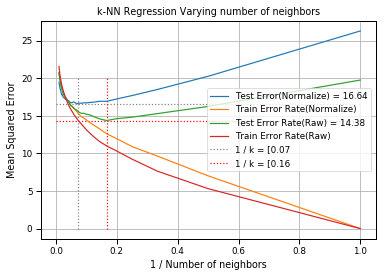

In [13]:
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_data, y_data = load_data("./assets/data.csv")
transformer = Normalizer().fit(X_data)
X_train_normalize = transformer.transform(X_data)

alternative_k = np.arange(1, 101)
train_error_normal = np.empty(len(alternative_k))
test_error_normal = np.empty(len(alternative_k))
train_error_raw = np.empty(len(alternative_k))
test_error_raw = np.empty(len(alternative_k))

X_train, X_test, y_train, y_test = train_test_split_by_ratio(X_data, y_data, random_state=2333)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split_by_ratio(X_train_normalize, y_data,
                                                                                         random_state=2333)

for index, k in enumerate(alternative_k):
    knn_normalize = KNeighborsRegressor(n_neighbors=k).fit(X_train_normal, y_train_normal)
    knn_raw = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

    y_train_normal_predict = knn_normalize.predict(X_train_normal)
    y_test_normal_predict = knn_normalize.predict(X_test_normal)
    y_train_predict = knn_raw.predict(X_train)
    y_test_predict = knn_raw.predict(X_test)

    train_error_normal[index] = mean_squared_error(y_train_normal,y_train_normal_predict)

    test_error_normal[index] = mean_squared_error(y_test_normal, y_test_normal_predict)

    train_error_raw[index] = mean_squared_error(y_train, y_train_predict)

    test_error_raw[index] = mean_squared_error(y_test, y_test_predict)

lowest_error_test_normal = np.min(test_error_normal)
lowest_error_test_raw = np.min(test_error_raw)
best_normal_k_ = np.reshape(np.argwhere(test_error_normal == lowest_error_test_normal), (1, -1))[0] + 1
best_raw_k_ = np.reshape(np.argwhere(test_error_raw == lowest_error_test_raw), (1, -1))[0] + 1

plt.title('k-NN Regression Varying number of neighbors')
plt.plot(1 / alternative_k, test_error_normal,
         label='Test Error(Normalize) = ' + str(lowest_error_test_normal)[:5])
plt.plot(1 / alternative_k, train_error_normal, label='Train Error Rate(Normalize)')
plt.plot(1 / alternative_k, test_error_raw,
         label='Test Error Rate(Raw) = ' + str(lowest_error_test_raw)[:5])
plt.plot(1 / alternative_k, train_error_raw, label='Train Error Rate(Raw)')
plt.vlines(1 / best_normal_k_, 0, 20, colors='gray', label='1 / k = ' + str(1 / best_normal_k_)[:5],
           linestyles='dotted')
plt.hlines(lowest_error_test_normal, 0, 1, colors='gray', linestyles='dotted')
plt.vlines(1 / best_raw_k_, 0, 20, colors='red', label='1 / k = ' + str(1 / best_raw_k_)[:5],
           linestyles='dotted')
plt.hlines(lowest_error_test_raw, 0, 1, colors='red', linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('1 / Number of neighbors')
plt.ylabel('Mean Squared Error')
plt.show()

## (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

#### Answers: We got the linear regression model smallest test error (MES) is 19.54 from (h). But the KNN regressionMSE in raw data form is 14.38. Based on what I got, we can come to a conclusion that KNN regression model is more optimal than Multiple Linear Regression model on this issue.

## ISLR: 2.4.1

### For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
- (a) The sample size n is extremely large, and the number of predictors p is small.

#### Answer: When the data size is way bigger than features, we get a higher degree of freedom, which means we should use a method with high flexibility. Since if we use an inflexible method (like a linear model), the model cannot fit the training data very well, so we get higher bias. So we would better choose a flexible method to fit more data as much as possible.

- (b) The number of predictors p is extremely large, and the number of observations n is small.

#### Answer：When the feature's size is bigger than the sample's, we use an inflexible method will be enough. inflexible model is good enough to describe the trend. but if we use a flexible method, we may overfit the data, causing the high variance.

- (c) The relationship between the predictors and response is highly non-linear.

#### Answer：the relationship is non-linear, which means we need a model with high flexibility. If we use an inflexible method to fit data, it is highly likely we will have underfitting.

- (d) The variance of the error terms, i.e. σ^2 = Var(ε), is extremely high.

#### Answer：An inflexible method is better. The flexible model has a high degree of freedom, it usually has a lower bias but higher variance. Since the Var(ε) is already is very high, so we should choose an inflexible to make a balance.

## LSLR: 2.4.7

### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

<img src="http://18.221.181.167:8090/upload/2019/9/lslr_2_4_7-989a7aaf1ea8477d988d934bcdfae013.png" width="400" height="400">

### Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
- (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

#### Answer: as we know, the Euclidean distance formula in 3 dimension is sqrt((Xa - Xb)^2 + (Ya - Yb)^2 + (Za - Zb)^2)

I assume 6 dta point called A, B, C D, E, F and the test point is Z
$$distance_{A,Z} = {\sqrt{0 + 3^2 + 0}} = {\sqrt{10}}$$<br>
$$distance_{B,Z} = {\sqrt{2^2 + 0 + 0}} = {\sqrt{4} = 2}$$<br>
$$distance_{C,Z} = {\sqrt{0 + 1^2 + 3^2}} = {\sqrt{10}}$$<br>
$$distance_{D,Z} = {\sqrt{0 + 1^2 + 2^2}} = {\sqrt{5}}$$<br>
$$distance_{E,Z} = {\sqrt{(-1)^2 + 0 + 1^2}} = {\sqrt{2}}$$<br>
$$distance_{F,Z} = {\sqrt{1^2 + 1^2 + 1^2}} = {\sqrt{3}}$$

- (b) What is our prediction with K = 1? Why?

#### Answer: from the distances, it is clear that the 5th observation is the closest data point. and the 5th is green. so the test point(0,0,0) is green.

- (c) What is our prediction with K = 3? Why?

#### Answer: from the distances, we know the first three closest data point are 5th, 6th, and 2nd, in these three data, 2 redpoint and one green. so the test point is red.

- (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

#### Answer:  It said the Bayes decision boundary is non-linear, so the model has high flexibility. but when k increasing, the model's flexibility will decrease. So a high flexibility model suggests a lower k. In short, we should expect the best value for K is small.